In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
(trainX, trainY), (testX, testY) = mnist.load_data()

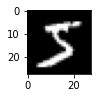

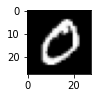

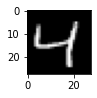

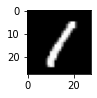

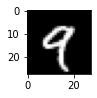

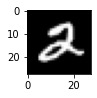

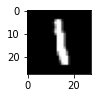

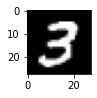

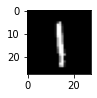

In [4]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [7]:
X_train = np.reshape(X_train,(len(X_train), 28*28))

In [8]:
X_test = np.reshape(X_test,(len(X_test), 28*28))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=784,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [12]:
model.fit(x=X_train,
         y=y_train,
         epochs=20,
         validation_data=(X_test, y_test),
         verbose=1,
         callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1802 - val_loss: 0.1016
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0796 - val_loss: 0.0732
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0559 - val_loss: 0.0725
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0444 - val_loss: 0.0798
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0362 - val_loss: 0.0755
Epoch 00005: early stopping


<AxesSubplot:>

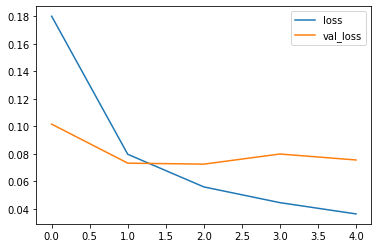

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [14]:
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
myG = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [33]:
myG = np.reshape(myG, (1,784))
myG=scaler.transform(myG)
myPred = model.predict(myG)

In [34]:
print(myPred)

[[1.8302165e-24 1.9822925e-22 5.1318671e-26 1.0625563e-13 7.9332277e-23
  1.0000000e+00 4.4000821e-14 1.0505099e-20 1.3938116e-16 6.0456484e-16]]


In [35]:
np.argmax(myPred,axis=1)

array([5])